In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open("jmh-result.json", "r") as file:
    json_file = json.load(file)

In [3]:
import re


In [14]:
average_time = {}
for i in range(len(json_file)):
    benchmark = json_file[i]['benchmark']
    benchmark = re.sub('com.test.MyBenchmark.test',"", benchmark)
    benchmark = tuple(map(int, benchmark.split("vs")))
    time = json_file[i]['primaryMetric']['score']
    average_time[benchmark] = time

In [6]:
final_size = []
initial_size = []
time = []
for k, v in average_time.items():
    final_size.append(k[0])
    initial_size.append(k[1])
    time.append(v)

In [15]:
average_time

{(9999, 10): 100010.6559468856,
 (9999, 100): 101935.29807834513,
 (9999, 1000): 98693.81658958146,
 (9999, 10000): 48579.73788248475,
 (999, 10): 9165.53726703801,
 (999, 100): 10883.756454038541,
 (999, 1000): 4250.204251224669,
 (999, 10000): 12426.931422468677,
 (99, 10): 837.0381426711787,
 (99, 100): 623.358948266474,
 (99, 1000): 1125.3516975104933,
 (99, 10000): 7680.472465150415,
 (9, 10): 52.87015842583219,
 (9, 100): 76.71490239979849,
 (9, 1000): 965.4372092017766,
 (9, 10000): 7570.84995865862}

In [13]:
df = pd.DataFrame(data = {"final_size": final_size, "initial_size": initial_size, "average_time": time})

In [8]:
df

,final_size,initial_size,average_time
0,9999,10,100010.655947
1,9999,100,101935.298078
2,9999,1000,98693.816590
3,9999,10000,48579.737882
4,999,10,9165.537267
5,999,100,10883.756454
6,999,1000,4250.204251
7,999,10000,12426.931422
8,99,10,837.038143
9,99,100,623.358948


In [16]:
final_size

[9999, 9999, 9999, 9999, 999, 999, 999, 999, 99, 99, 99, 99, 9, 9, 9, 9]

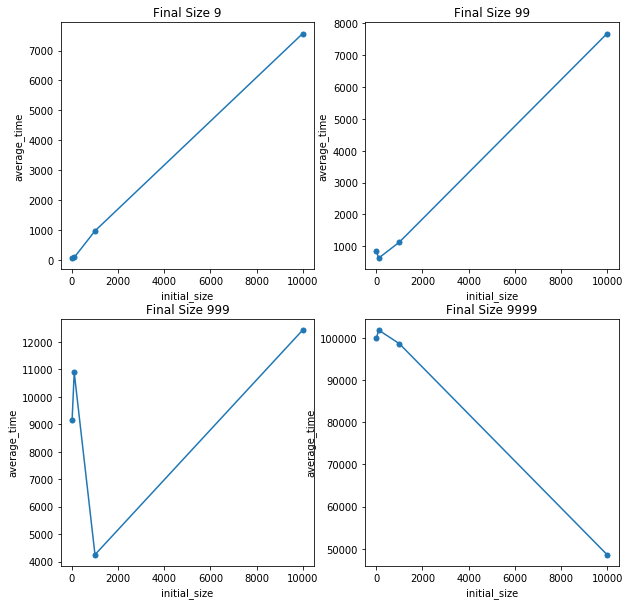

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
idx = 0
di = [0, 0, 1, 1]
dj = [0, 1, 0, 1]
for n in sorted(set(final_size)):
    df_n = df[df['final_size'] == n]
    axs[di[idx], dj[idx]].set_title("Final Size "+str(n))
    axs[di[idx], dj[idx]].set_xlabel("initial_size")
    axs[di[idx], dj[idx]].set_ylabel("average_time")
    axs[di[idx], dj[idx]].plot(df_n['initial_size'], df_n['average_time'], marker='.', markersize=10)
    idx += 1
fig.savefig("java_arraylist.eps")